In [12]:
# install Python libraries
pip install requests beautifulsoup4 requests-html
pip install requests

SyntaxError: ignored

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.parse import urlparse
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import requests
from bs4 import BeautifulSoup
import os
from collections import Counter
import re
from tabulate import tabulate

In [201]:
# enter the boardgame url
# ref: url for page 1 > https://boardgamegeek.com/browse/boardgame/page/1

import requests

base_url = 'https://boardgamegeek.com/browse/boardgame/page/'

# create an empty list for storing game
game_titles = []
game_descriptions = []
game_ratings1 = []
game_ratings2 = []

# set the page number = 100 as we focus on hot games. the total page is 1482
total_pages = 100

In [202]:

# Loop through all pages
for page_number in range(1, total_pages + 1):
    # Construct the URL for the current page
    page_url = f'{base_url}{page_number}'

    # Send an HTTP GET request to the URL
    response = requests.get(page_url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract all the board game information for the current page
        titles = soup.find_all('a', class_='primary')
        descriptions = soup.find_all('p', class_='smallefont dull')
        ratings1 = soup.find_all('td', class_='collection_bggrating')
        ratings2 = soup.find_all('td', class_='collection_objectname')

        # Loop through the elements and append data to the respective lists
        for title, description, rating1, release_date in zip(titles, descriptions, ratings1, ratings2):
            game_titles.append(title.text.strip())
            game_descriptions.append(description.text.strip())
            game_ratings1.append(rating.text.strip())
            game_ratings2.append(release_date.find_next('td').text.strip())

    else:
        print(f"Failed to retrieve page {page_number}.")

# Create a DataFrame from the collected data
df = pd.DataFrame({
    'Game Title': game_titles,
    'Description': game_descriptions,
    'Greek Rating': game_ratings2
})

# Print the first few rows of the DataFrame
print(df.head())


                          Game Title  \
0                  Brass: Birmingham   
1          Pandemic Legacy: Season 1   
2                         Gloomhaven   
3                           Ark Nova   
4  Twilight Imperium: Fourth Edition   

                                         Description Greek Rating  
0  Build networks, grow industries, and navigate ...        8.424  
1  Mutating diseases are spreading around the wor...        8.389  
2  Vanquish monsters with strategic cardplay. Ful...        8.380  
3  Plan and build a modern, scientifically manage...        8.312  
4  Build an intergalactic empire through trade, r...        8.240  


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Game Title    995 non-null    object
 1   Description   995 non-null    object
 2   Greek Rating  995 non-null    object
dtypes: object(3)
memory usage: 23.4+ KB


In [204]:
df.head()

,Game Title,Description,Greek Rating
0,Brass: Birmingham,"Build networks, grow industries, and navigate ...",8.424
1,Pandemic Legacy: Season 1,Mutating diseases are spreading around the wor...,8.389
2,Gloomhaven,Vanquish monsters with strategic cardplay. Ful...,8.380
3,Ark Nova,"Plan and build a modern, scientifically manage...",8.312
4,Twilight Imperium: Fourth Edition,"Build an intergalactic empire through trade, r...",8.240


In [207]:
# Tokenize and count words in the 'Description' column
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [209]:
# Create a list of stopwords to filter out common words
stop_words = set(stopwords.words('english'))


In [212]:
# Tokenize and count words
tokens = []
for description in df['Description']:
    words = word_tokenize(description)
    for word in words:
        word = word.lower()  # Convert to lowercase
        if word.isalpha() and word not in stop_words:  # Filter out non-alphabetic and stop words
            tokens.append(word)

# Count the frequency of each token
token_counts = Counter(tokens)

# Get the most common keywords (top 10 in this example)
most_common_keywords = token_counts.most_common(30)

# Print the most common keywords and their counts
for keyword, count in most_common_keywords:
    print(f"{keyword}: {count}")

build: 144
game: 80
world: 41
race: 40
fight: 39
control: 39
dice: 36
new: 36
use: 35
city: 34
best: 33
cards: 30
team: 29
compete: 29
empire: 28
win: 27
become: 27
develop: 26
explore: 25
battle: 25
together: 24
goods: 24
work: 24
trade: 23
create: 23
take: 23
make: 22
help: 22
power: 22
heroes: 22


In [214]:
# Exclude some common worlds
exclude_words = {'game', 'new', 'best', 'become', 'use'}

In [224]:
# empty the list to store filtered words
tokens = []

for description in df['Description']:
    words = word_tokenize(description)
    for word in words:
        word = word.lower()  # Convert to lowercase
        if word.isalpha() and word not in stop_words and word not in exclude_words:
            tokens.append(word)

# Count the frequency of each token
token_counts = Counter(tokens)

# Get the most common keywords (top 10 in this example)
most_common_keywords = token_counts.most_common(10)


In [222]:
words, counts = zip(*most_common_keywords)

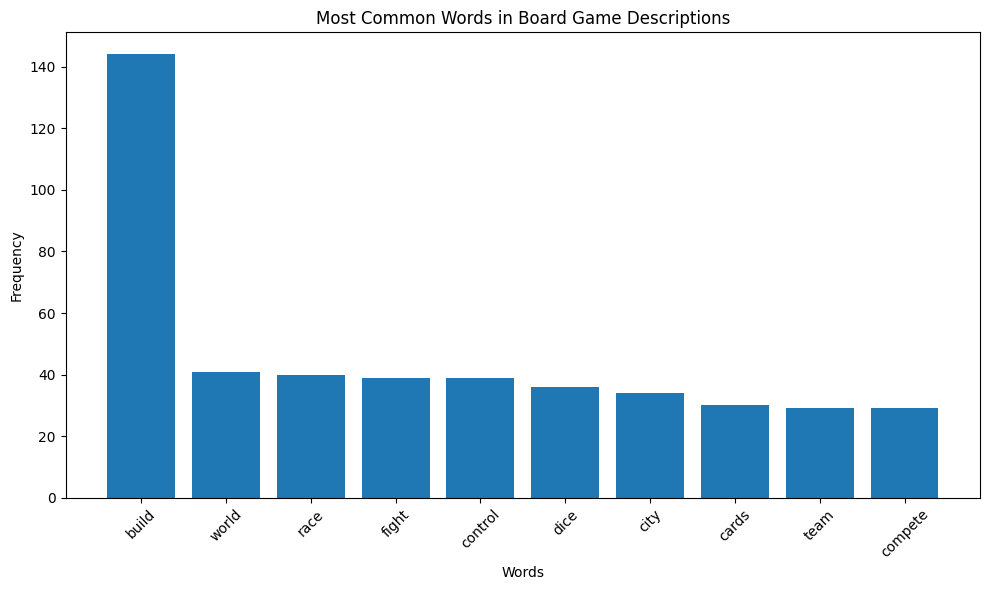

In [223]:
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Board Game Descriptions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the chart
plt.show()

# Fun fact #1
# In the results, we can find that the most common word is 'Build'
# It seems people would love to theme of building or create sometihngs

# Fun fact #2
# The wordings like 'race', 'fight', and 'control' are occupied 3rd, 4th, and 5th.
# It seems gamers who enjoy racing games may appreciate the thrill of competition

In [232]:
# Words to exclude
exclude_words = {'the', 'game', 'of', 'edition', 'second', 'a'}

In [233]:
# Tokenize and count words while excluding specified words
tokens = []
for title in df['Game Title']:
    words = word_tokenize(title)
    for word in words:
        word = word.lower()  # Convert to lowercase
        if word.isalpha() and word not in exclude_words:
            tokens.append(word)

# Count the frequency of each token
token_counts = Counter(tokens)

# Get the most common word
most_common_word, most_common_count = token_counts.most_common(1)[0]

# Fun fact #3
# 'war'is the most common word in the game title!
print(f"The most common word in game titles is '{most_common_word}' with a count of {most_common_count}.")

The most common word in game titles is 'wars' with a count of 22.


In [241]:
# set the key war
search_word = 'war'

# Tokenize words and filter titles containing the search word
filtered_titles = [title for title in df['Game Title'] if search_word in word_tokenize(title.lower())]

# Sort the DataFrame by 'Rating' in descending order
df.sort_values(by='Greek Rating', ascending=False, inplace=True)

# Filter the DataFrame to include only the top 10 games with 'war' in the title
top_10_war_games = df[df['Game Title'].isin(filtered_titles)].head(10)

# Display the results in a table
table = tabulate(top_10_war_games, headers='keys', tablefmt='grid')
print(table)

+-----+------------------------------------------+---------------------------------------------------------------------------------------+----------------+
|     | Game Title                               | Description                                                                           |   Greek Rating |
+=====+==========================================+=======================================================================================+================+
|   8 | War of the Ring: Second Edition          | The Fellowship and the Free Peoples clash with Sauron over the fate of Middle-Earth.  |          8.175 |
+-----+------------------------------------------+---------------------------------------------------------------------------------------+----------------+
| 114 | Aeon's End: War Eternal                  | War Eternal is a standalone game compatible with the deck building game Aeon's End.   |          7.486 |
+-----+------------------------------------------+--------------